In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [4]:
folder_loc = r'O:\Utbygging\Fagress\BFA40 Konstruksjoner\10 Faggrupper\01 Metocean\Data\Vinddata\Langtidskorrigerte\langtidskorrigerte_enkeltpunkter'
file_name='\Bjornafjorden3.csv'
file_in = folder_loc+file_name
df = pd.read_csv (file_in)

In [5]:
df

,time,ws at 10m,wd at 10m,ws at 19m,wd at 19m,ws at 60m,wd at 60m,ws at 117m,wd at 117m,ws at 197m,wd at 197m,ws at 296m,wd at 296m
0,1979-01-01 04:00:00,7.015209,84.584506,7.103675,84.584506,7.575139,86.455027,7.634525,84.404371,8.031153,83.060010,8.758827,84.104043
1,1979-01-01 05:00:00,6.039928,88.028320,6.112868,88.028320,6.465273,89.836594,6.534037,87.949224,6.883712,86.933542,7.438869,89.130023
2,1979-01-01 06:00:00,5.322214,90.420440,5.354278,90.420440,5.651251,92.092837,5.753325,90.286604,6.088559,89.863210,6.537636,93.067345
3,1979-01-01 07:00:00,5.442402,91.445642,5.472222,91.445642,5.776281,93.116009,5.863593,91.326406,6.207699,91.109095,6.662676,94.762548
4,1979-01-01 08:00:00,6.039398,89.364530,6.112536,89.364530,6.464494,91.106976,6.533828,89.250763,6.883584,88.642652,7.438320,91.423267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363019,2020-05-30 23:00:00,1.850246,95.392723,1.867271,95.392723,2.082385,96.841753,2.223609,95.321579,2.425811,96.351172,2.494690,101.268707
363020,2020-05-31 00:00:00,3.050457,98.012992,3.060534,98.012992,3.333134,99.404271,3.490889,98.282988,3.793268,100.394992,3.954043,106.165194
363021,2020-05-31 01:00:00,2.618309,113.933246,2.783325,113.933246,2.805400,115.140787,3.234219,118.642051,3.751413,127.181183,4.558486,137.674030
363022,2020-05-31 02:00:00,3.323307,143.014413,3.672687,143.014413,4.693266,145.972760,5.614967,150.410222,5.681335,155.484246,5.035782,161.462868


Text(0.5, 1.0, 'Bjørnafjord')

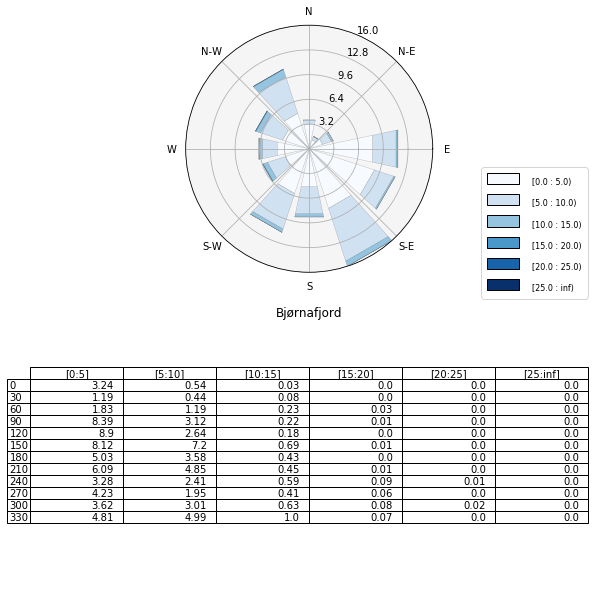

In [6]:
fig,big_axes = plt.subplots(2,1,figsize = (10, 10))
for big_ax in big_axes:
        big_ax.tick_params(labelcolor=(1.,1.,1.,0.0),top=False,bottom=False,
                           left=False,right=False,axis='both', which='both')
        big_ax._frameon=False

ax1 = fig.add_subplot(2,1,1, projection='windrose')
ax1.bar(df['wd at 10m'],df['ws at 10m'], normed=True, nsector=12, 
                bins = np.arange(0,30,5), 
       cmap = plt.cm.Blues, edgecolor = 'black', linewidth = .1)
ax1.set_legend(bbox_to_anchor=(1.2,-0.1), fontsize=16)
ax1.set_facecolor('whitesmoke')
table = ax1._info['table']
bins = ax1._info['bins']
freq_table = pd.DataFrame(table).T
#pd.options.display.float_format = '{:,.2f}'.format
freq_table.index=['{:d}'.format(int(col+15)%360) for col in ax1._info['dir']]
freq_table.columns=[ '[{:s}:{:s}]'.format(str(row),str(bins[cc+1])) 
                  for cc,row in enumerate(bins[:-1])]

ax2 = fig.add_subplot(2,1,2)
ax2.axis('tight')
ax2.axis('off')
pd.plotting.table(ax2, np.round(freq_table, 2), loc='center')
plt.title('Bjørnafjord')

In [7]:
table = ax1._info['table']

In [8]:
freq_table.to_csv('savefil_frq.csv')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Dir'],'.')